## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 121us/step - loss: 1.9813 - accuracy: 0.2947 - val_loss: 1.8224 - val_accuracy: 0.3605
Epoch 2/200
50000/50000 [==============================] - 6s 113us/step - loss: 1.7682 - accuracy: 0.3731 - val_loss: 1.7059 - val_accuracy: 0.3970
Epoch 3/200
50000/50000 [==============================] - 6s 114us/step - loss: 1.6766 - accuracy: 0.4052 - val_loss: 1.6531 - val_accuracy: 0.4136
Epoch 4/200
50000/50000 [==============================] - 6s 114us/step - loss: 1.6255 - accuracy: 0.4238 - val_loss: 1.5902 - val_accuracy: 0.4355
Epoch 5/200
50000/50000 [==============================] - 6s 113us/step - loss: 1.5682 - accuracy: 0.4475 - val_loss: 1.5792 - val_accuracy: 0.4408
Epoch 6/200
50000/50000 [==============================] - 6s 118us/step - loss: 1.5248 - accuracy: 0.4613 - val_loss: 1.5788 - val_accuracy: 0.4421
Epoch 7/200
50000/50000 [==============================]

50000/50000 [==============================] - 6s 117us/step - loss: 1.0267 - accuracy: 0.6337 - val_loss: 1.4041 - val_accuracy: 0.5240
Epoch 56/200
50000/50000 [==============================] - 6s 126us/step - loss: 1.0263 - accuracy: 0.6365 - val_loss: 1.4275 - val_accuracy: 0.5125
Epoch 57/200
50000/50000 [==============================] - 7s 130us/step - loss: 1.0142 - accuracy: 0.6394 - val_loss: 1.4394 - val_accuracy: 0.5155
Epoch 58/200
50000/50000 [==============================] - 6s 116us/step - loss: 1.0160 - accuracy: 0.6394 - val_loss: 1.4258 - val_accuracy: 0.5173
Epoch 59/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.0054 - accuracy: 0.6435 - val_loss: 1.4379 - val_accuracy: 0.5180
Epoch 60/200
50000/50000 [==============================] - 6s 114us/step - loss: 1.0008 - accuracy: 0.6459 - val_loss: 1.4272 - val_accuracy: 0.5159
Epoch 61/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.9934 - accuracy: 0.6478 - val

50000/50000 [==============================] - 6s 113us/step - loss: 0.8317 - accuracy: 0.7057 - val_loss: 1.6530 - val_accuracy: 0.5070
Epoch 110/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.8339 - accuracy: 0.7034 - val_loss: 1.6537 - val_accuracy: 0.5016
Epoch 111/200
50000/50000 [==============================] - 6s 112us/step - loss: 0.8294 - accuracy: 0.7050 - val_loss: 1.6376 - val_accuracy: 0.4996
Epoch 112/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.8258 - accuracy: 0.7077 - val_loss: 1.6592 - val_accuracy: 0.5041
Epoch 113/200
50000/50000 [==============================] - 6s 115us/step - loss: 0.8135 - accuracy: 0.7120 - val_loss: 1.6770 - val_accuracy: 0.4986
Epoch 114/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.8237 - accuracy: 0.7084 - val_loss: 1.6571 - val_accuracy: 0.5044
Epoch 115/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.8128 - accuracy: 0.7121

50000/50000 [==============================] - 6s 113us/step - loss: 0.7153 - accuracy: 0.7437 - val_loss: 1.9259 - val_accuracy: 0.4920
Epoch 164/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.7102 - accuracy: 0.7463 - val_loss: 1.9037 - val_accuracy: 0.4942
Epoch 165/200
50000/50000 [==============================] - 6s 116us/step - loss: 0.7060 - accuracy: 0.7485 - val_loss: 1.9171 - val_accuracy: 0.4945
Epoch 166/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.7026 - accuracy: 0.7509 - val_loss: 1.8790 - val_accuracy: 0.4952
Epoch 167/200
50000/50000 [==============================] - 6s 115us/step - loss: 0.6887 - accuracy: 0.7563 - val_loss: 1.9837 - val_accuracy: 0.4824
Epoch 168/200
50000/50000 [==============================] - 6s 115us/step - loss: 0.6950 - accuracy: 0.7509 - val_loss: 1.9656 - val_accuracy: 0.4853
Epoch 169/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.7031 - accuracy: 0.7480

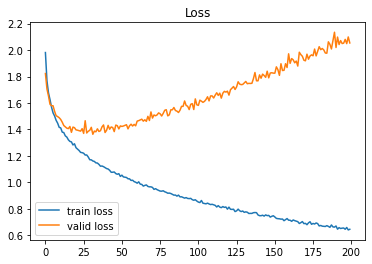

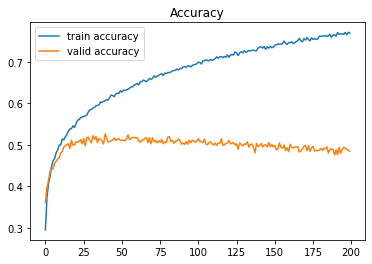

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()